# **Penambangan Data**

## Dissimilarity (Tugas 1)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/Nurul-Faizah/Dataset/main/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(url)

In [ ]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
# Show dataset shape
number_of_columns = data.shape[1]

In [ ]:
# Show all columns for dataset
pd.set_option('display.max_columns', number_of_columns)
pd.set_option('display.max_rows', number_of_columns)

In [ ]:
# Show all columns from dataframe
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### Categorical/ Nominal


*   gender
*   heart_disease



In [ ]:
data[["id","gender", "heart_disease"]].head(5)

,id,gender,heart_disease
0,9046,Male,1
1,51676,Female,0
2,31112,Male,1
3,60182,Female,0
4,1665,Female,0


###Change Value 0/1
Value of gender

*   Female = 1
*   Male = 0



In [ ]:
# gender code
code_f = "Female"
code_m = "Male"

# binary value
value_of_one = 1
value_of_zero = 0

def change_code_gender_to_biner(gender):
    return value_of_one if gender == code_m else value_of_zero

In [ ]:
# Update all values of 'gender' series
data["gender"] = data["gender"].apply(change_code_gender_to_biner)

In [ ]:
data[["id","gender", "heart_disease"]].head(5)

,id,gender,heart_disease
0,9046,1,1
1,51676,0,0
2,31112,1,1
3,60182,0,0
4,1665,0,0


In [ ]:
# CONSTAN VARIABLE
DECREMENT_BY_ONE = 1
INCREMENT_BY_ONE = 1

CONTINGENCY_TABLE_VALUE = {
    "q" : (1,1),
    "r" : (1,0),
    "s" : (0,1),
    "t" : (0,0),
}

In [ ]:
def get_series(data, idx, series):
    return data.loc[(idx), series]

In [ ]:
def get_dissimilarity_dataset(data, series_index = [], series = []):
    first_series = get_series(data, series_index[0], series)
    second_series = get_series(data, series_index[1], series)
    dataset = pd.concat([first_series,second_series],axis=1)
    return dataset.T

In [ ]:
get_dissimilarity_dataset(data, [1,2], ["gender", "heart_disease"]).T

,1,2
gender,0,1
heart_disease,0,1


In [ ]:
data.loc[0:4, ["gender", "heart_disease"]]

,gender,heart_disease
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0


In [ ]:
def count_contingency_value(data, start_index = 0, last_index = 1):

    CONTINGENCY_VALUE = {
        "q" : 0,
        "r" : 0,
        "s" : 0,
        "t" : 0,
    }

    column_range = data.shape[1]

    for column in range(column_range):
        for value in CONTINGENCY_TABLE_VALUE:
            item = list((tuple(data.loc[(start_index):(last_index), data.columns[column]]) == CONTINGENCY_TABLE_VALUE[value], value))
            if item[0] == True:
                if item[1] == "q":
                    CONTINGENCY_VALUE["q"] += 1
                if item[1] == "r":
                    CONTINGENCY_VALUE["r"] += 1
                if item[1] == "s":
                    CONTINGENCY_VALUE["s"] += 1
                if item[1] == "t":
                    CONTINGENCY_VALUE["t"] += 1

    return CONTINGENCY_VALUE

In [ ]:
# d(1,2)
data_1_2 = get_dissimilarity_dataset(data, [1,2], ["gender", "heart_disease"])

In [ ]:
c_d_1_2 = count_contingency_value(data_1_2, 1, 2)

In [ ]:
# d(1,3)
data_1_3 = get_dissimilarity_dataset(data, [1,3], ["gender", "heart_disease"])

In [ ]:
c_d_1_3 = count_contingency_value(data_1_3, 1, 3)

In [ ]:
# d(1,4)
data_1_4 = get_dissimilarity_dataset(data, [1,4], ["gender", "heart_disease"])

In [ ]:
c_data_1_4 = count_contingency_value(data_1_4, 1, 4)

In [ ]:
# d(1,5)
data_1_5 = get_dissimilarity_dataset(data, [1,5], ["gender", "heart_disease"])

In [ ]:
c_data_1_5 = count_contingency_value(data_1_5, 1, 5)

### Dissimilarity Binary Assymetric Value Formula
$$\frac {p + r } {q + r + s}$$

In [ ]:
def measure_dissimilarity_binary_value_assymetric_distance(contingency_value):

    return (contingency_value["r"] + contingency_value["s"]) / (contingency_value["q"] + contingency_value["r"] + contingency_value["s"])

In [ ]:
d_1_2 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_2)
d_1_3 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_2)
d_1_4 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_2)

In [ ]:
d_1_2

1.0

In [ ]:
d_1_3

1.0

In [ ]:
d_1_4

1.0

## Diskritisasi (Tugas 2)

### Pengertian Diskritisasi
Diskritisasi adalah mengurangi jumlah nilai-nilai dari atribut kontinu yang diberikan dengan membagi range atribut kedalam interval-interval. Label interval tersebut dapat mengganti nilai data sesungguhnya.
Diskritisasi adalah proses mengubah data bertipe data numeric menjadi data bertipe categorical.

Diskritisasi memiliki 2 pendekatan yaitu equal-width intervals dan equal-frequency intervals


*   equal-width intervals adalah diskritisasi dengan lebar data yang sama.
*  equal-frequency intervals adalah diskritisasi dengan jumlah data yang sama

### Cut
Cut adalah sebuah method pada library pandas untuk melakukan perhitungan equal width frequency intervals

**Soal**
1. Carilah data yang bertipe numerik ( data klassifikasi)

2. Lakukan proses diskritisasi dengan equal width dan equal frequency

3. Lakukan proses diskritisasi  dengan basis entropy

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
data = pd.read_csv(url)

In [ ]:
data.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [ ]:
# CONSTAN SERIES

SEPAL_LENGTH_SERIES = data["sepal.length"]
SEPAL_WIDTH_SERIES = data["sepal.width"]
PETAL_LENGTH_SERIES = data["petal.length"]
PETAL_WIDTH_SERIES = data["petal.width"]

### Menghitung Data

### Sepal Width
Equal Width Intervals lebar kelopak bunga Iris

Dikelompokkan menjadi 3 kategori yaitu

Kategori sedikit lebar

Kategori lebar

Kategori sangat lebar

In [ ]:
# equal-width intervals

labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

sepal_width_ew_binning = pd.cut(SEPAL_WIDTH_SERIES, amount_of_binning, True, labels)
labelled_sepal_width_ew_binning = sepal_width_ew_binning.value_counts()
interval_sepal_width_ew_binning = pd.cut(SEPAL_WIDTH_SERIES, amount_of_binning, True).value_counts()

In [ ]:
# dataframe of sepal-width and sepal category
pd.concat((SEPAL_WIDTH_SERIES, sepal_width_ew_binning), axis=1)

,sepal.width,sepal.width
0,3.5,Lebar
1,3.0,Lebar
2,3.2,Lebar
3,3.1,Lebar
4,3.6,Lebar
...,...,...
145,3.0,Lebar
146,2.5,Sedikit Lebar
147,3.0,Lebar
148,3.4,Lebar


In [ ]:
# equal-width intervals binning with label
labelled_sepal_width_ew_binning

Lebar            88
Sedikit Lebar    47
Sangat Lebar     15
Name: sepal.width, dtype: int64

In [ ]:
# equal-width intervals without label
interval_sepal_width_ew_binning

(2.8, 3.6]      88
(1.998, 2.8]    47
(3.6, 4.4]      15
Name: sepal.width, dtype: int64

### Petal Width
Equal Width Intervals lebar mahkota bunga Iris

Dikelompokkan menjadi 3 kategori yaitu

Kategori sedikit lebar

Kategori lebar

Kategori sangat lebar

In [ ]:
# equal-width intervals
labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

petal_width_ew_binning = pd.cut(PETAL_WIDTH_SERIES, amount_of_binning, True, labels)
labelled_petal_width_ew_binning = petal_width_ew_binning.value_counts()
interval_petal_width_ew_binning = pd.cut(PETAL_WIDTH_SERIES, amount_of_binning, True).value_counts()

In [ ]:
# dataframe of petal-width and petal category
pd.concat((PETAL_WIDTH_SERIES, petal_width_ew_binning), axis=1)

,petal.width,petal.width
0,0.2,Sedikit Lebar
1,0.2,Sedikit Lebar
2,0.2,Sedikit Lebar
3,0.2,Sedikit Lebar
4,0.2,Sedikit Lebar
...,...,...
145,2.3,Sangat Lebar
146,1.9,Sangat Lebar
147,2.0,Sangat Lebar
148,2.3,Sangat Lebar


In [ ]:
# equal-width intervals with label
labelled_petal_width_ew_binning

Lebar            54
Sedikit Lebar    50
Sangat Lebar     46
Name: petal.width, dtype: int64

In [ ]:
# equal-width intervals without label
interval_petal_width_ew_binning

(0.9, 1.7]       54
(0.0976, 0.9]    50
(1.7, 2.5]       46
Name: petal.width, dtype: int64

### Sepal Length
Equal Width Intervals panjang kelopak bunga Iris

Dikelompokkan menjadi 3 kategori yaitu

Kategori sedikit lebar

Kategori lebar

Kategori sangat lebar

In [ ]:
# equal-width intervals

labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

sepal_length_ew_binning = pd.cut(SEPAL_LENGTH_SERIES, amount_of_binning, True, labels)
labelled_sepal_length_ew_binning = sepal_length_ew_binning.value_counts()
interval_sepal_length_ew_binning = pd.cut(SEPAL_LENGTH_SERIES, amount_of_binning, True).value_counts()

In [ ]:
# dataframe of sepal-width and sepal category
pd.concat((SEPAL_LENGTH_SERIES, sepal_length_ew_binning), axis=1)

,sepal.length,sepal.length
0,5.1,Sedikit Lebar
1,4.9,Sedikit Lebar
2,4.7,Sedikit Lebar
3,4.6,Sedikit Lebar
4,5.0,Sedikit Lebar
...,...,...
145,6.7,Lebar
146,6.3,Lebar
147,6.5,Lebar
148,6.2,Lebar


In [ ]:
# equal-width intervals with label
labelled_sepal_length_ew_binning

Lebar            71
Sedikit Lebar    59
Sangat Lebar     20
Name: sepal.length, dtype: int64

In [ ]:
# equal-width intervals without label
interval_sepal_length_ew_binning

(5.5, 6.7]      71
(4.296, 5.5]    59
(6.7, 7.9]      20
Name: sepal.length, dtype: int64

### Petal Lenght
Equal Width Intervals panjang mahkota bunga Iris

Dikelompokkan menjadi 3 kategori yaitu

Kategori sedikit lebar

Kategori lebar

Kategori sangat lebar

In [ ]:
# equal-width intervals
labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

petal_length_ew_binning = pd.cut(PETAL_LENGTH_SERIES, amount_of_binning, True, labels)
labelled_petal_length_ew_binning = petal_length_ew_binning.value_counts()
interval_petal_length_ew_binning = pd.cut(PETAL_LENGTH_SERIES, amount_of_binning, True).value_counts()

In [ ]:
# dataframe of petal-width and petal category
pd.concat((PETAL_LENGTH_SERIES,petal_length_ew_binning), axis=1)

,petal.length,petal.length
0,1.4,Sedikit Lebar
1,1.4,Sedikit Lebar
2,1.3,Sedikit Lebar
3,1.5,Sedikit Lebar
4,1.4,Sedikit Lebar
...,...,...
145,5.2,Sangat Lebar
146,5.0,Sangat Lebar
147,5.2,Sangat Lebar
148,5.4,Sangat Lebar


In [ ]:
# equal-width intervals binning with label
labelled_petal_length_ew_binning

Lebar            54
Sedikit Lebar    50
Sangat Lebar     46
Name: petal.length, dtype: int64

In [ ]:
# equal-width intervals out label
interval_petal_length_ew_binning

(2.967, 4.933]    54
(0.994, 2.967]    50
(4.933, 6.9]      46
Name: petal.length, dtype: int64

### Qcut
Qcut adalah sebuah method pada library pandas untuk melakukan perhitungan equal frequency intervals

### Sepal Width
Equal Frequency Intervals lebar kelopak bunga Iris

Dikelompokkan menjadi 3 kategori yaitu

Kategori sedikit lebar

Kategori lebar

Kategori sangat lebar

In [ ]:
# equal-frequency intervals

labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

sepal_width_ef_binning = pd.qcut(SEPAL_WIDTH_SERIES, amount_of_binning, labels)
labelled_sepal_width_ef_binning = sepal_width_ef_binning.value_counts()
interval_sepal_width_ef_binning = pd.qcut(SEPAL_WIDTH_SERIES, amount_of_binning).value_counts()

In [ ]:
# dataframe of sepal-width and sepal category
pd.concat((SEPAL_WIDTH_SERIES, sepal_width_ef_binning), axis = 1)

,sepal.width,sepal.width
0,3.5,Sangat Lebar
1,3.0,Lebar
2,3.2,Lebar
3,3.1,Lebar
4,3.6,Sangat Lebar
...,...,...
145,3.0,Lebar
146,2.5,Sedikit Lebar
147,3.0,Lebar
148,3.4,Sangat Lebar


In [ ]:
# equal-frequency intervals binning with label
labelled_sepal_width_ef_binning

Sedikit Lebar    57
Lebar            50
Sangat Lebar     43
Name: sepal.width, dtype: int64

In [ ]:
# equal-frequency intervals out label
interval_sepal_width_ef_binning

(1.999, 2.9]    57
(2.9, 3.2]      50
(3.2, 4.4]      43
Name: sepal.width, dtype: int64

###  Petal Widht

Equal Frequency Intervals lebar mahkota bunga Iris

Dikelompokkan menjadi 3 kategori yaitu

Kategori sedikit lebar

Kategori lebar

Kategori sangat lebar

In [ ]:
# equal-frequency intervals

labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

petal_width_ef_binning = pd.qcut(PETAL_WIDTH_SERIES, amount_of_binning, labels)
labelled_petal_width_ef_binning = petal_width_ef_binning.value_counts()
interval_petal_width_ef_binning = pd.qcut(PETAL_WIDTH_SERIES, amount_of_binning).value_counts()

In [ ]:
# dataframe of petal-width and petal category
pd.concat((PETAL_WIDTH_SERIES, petal_width_ef_binning), axis = 1)

,petal.width,petal.width
0,0.2,Sedikit Lebar
1,0.2,Sedikit Lebar
2,0.2,Sedikit Lebar
3,0.2,Sedikit Lebar
4,0.2,Sedikit Lebar
...,...,...
145,2.3,Sangat Lebar
146,1.9,Sangat Lebar
147,2.0,Sangat Lebar
148,2.3,Sangat Lebar


In [ ]:
# equal-frequency intervals binning with label
labelled_petal_width_ef_binning

Lebar            52
Sedikit Lebar    50
Sangat Lebar     48
Name: petal.width, dtype: int64

In [ ]:
# equal-frequency intervals without label
interval_petal_width_ef_binning

(0.867, 1.6]      52
(0.099, 0.867]    50
(1.6, 2.5]        48
Name: petal.width, dtype: int64

### Sepal Length
Equal Frequency Intervals panjang kelopak bunga Iris

Dikelompokkan menjadi 3 kategori yaitu

Kategori sedikit lebar

Kategori lebar

Kategori sangat lebar

In [ ]:
# equal-frequency intervals

labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

sepal_length_ef_binning = pd.qcut(SEPAL_LENGTH_SERIES, amount_of_binning, labels)
labelled_sepal_length_ef_binning = sepal_length_ef_binning.value_counts()
interval_sepal_length_ef_binning = pd.qcut(SEPAL_LENGTH_SERIES, amount_of_binning).value_counts()

In [ ]:
# dataframe of sepal-length and sepal category
pd.concat((SEPAL_LENGTH_SERIES, sepal_length_ef_binning), axis=1)

,sepal.length,sepal.length
0,5.1,Sedikit Lebar
1,4.9,Sedikit Lebar
2,4.7,Sedikit Lebar
3,4.6,Sedikit Lebar
4,5.0,Sedikit Lebar
...,...,...
145,6.7,Sangat Lebar
146,6.3,Lebar
147,6.5,Sangat Lebar
148,6.2,Lebar


In [ ]:
# equal-frequency intervals binning with label
labelled_sepal_length_ef_binning

Lebar            56
Sedikit Lebar    52
Sangat Lebar     42
Name: sepal.length, dtype: int64

In [ ]:
# equal-frequency intervals out label
interval_sepal_length_ef_binning

(5.4, 6.3]                   56
(4.2989999999999995, 5.4]    52
(6.3, 7.9]                   42
Name: sepal.length, dtype: int64

### Petal Length
Equal Frequency Intervals panjang mahkota bunga Iris

Dikelompokkan menjadi 3 kategori yaitu

Kategori sedikit lebar

Kategori lebar

Kategori sangat lebar

In [ ]:
# equal-frequency intervals

labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

petal_length_ef_binning = pd.qcut(PETAL_LENGTH_SERIES, amount_of_binning, labels)
labelled_petal_length_ef_binning = petal_length_ef_binning.value_counts()
interval_petal_length_ef_binning = pd.qcut(PETAL_LENGTH_SERIES, amount_of_binning).value_counts()

In [ ]:
# dataframe of petal-length and petal category
pd.concat((PETAL_LENGTH_SERIES, petal_length_ef_binning), axis=1)

,petal.length,petal.length
0,1.4,Sedikit Lebar
1,1.4,Sedikit Lebar
2,1.3,Sedikit Lebar
3,1.5,Sedikit Lebar
4,1.4,Sedikit Lebar
...,...,...
145,5.2,Sangat Lebar
146,5.0,Sangat Lebar
147,5.2,Sangat Lebar
148,5.4,Sangat Lebar


In [ ]:
# equal-frequency intervals binning with label
labelled_petal_length_ef_binning

Lebar            54
Sedikit Lebar    50
Sangat Lebar     46
Name: petal.length, dtype: int64

In [ ]:
# equal-frequency intervals out label
interval_petal_length_ef_binning

(2.633, 4.9]      54
(0.999, 2.633]    50
(4.9, 6.9]        46
Name: petal.length, dtype: int64

### Pengertian Entropy-based Binning
Metode berbasis Binning Entropy menggunakan pendekatan split. Entropi (atau konten informasi) dihitung berdasarkan label kelas. Secara intuitif,menemukan pemisahan terbaik sehingga bin semurni mungkin yang merupakan mayoritas nilai dalam bin sesuai dengan label kelas yang sama.

### Rumus Entropy 
 $$ Entropy = -Σ_i^n p_i log_2 p_i$$


In [ ]:
# dataframe about petal width (Equeal Frequency Interval)
data_petal_width_ef_binning

In [ ]:
# menentukan label
labels = ["sedikit_lebar", "lebar", "sangat_lebar"]

In [ ]:
# module to calculate log
from math import log2

In [ ]:
# dataframe
target_data = data_petal_width_ef
target_data

In [ ]:
# kategori label
labels = ["sedikit_lebar", "lebar", "sangat_lebar"]

In [ ]:
# fungsi untuk menghitung banyak data dari setiap kategori
def countEveryCategory(data_column, labels, column, category):
    group = data_column.groupby(category).count()
    amount_of_every_category = []
    for label in labels:
        amount_of_every_category.append(group.loc[label, column])
    return amount_of_every_category

In [ ]:
# split the given data based on category and split value 
def split(split_value, data_column, labels, col, category):
    less_group = data_column[data_column[col] < split_value]
    greater_group = data_column[data_column[col] >= split_value]
    
    length_less_group = countEveryCategory(less_group, labels, col, category)
    length_greater_group = countEveryCategory(greater_group, labels, col, category)
    
    return (length_less_group, length_greater_group)

### Rumus gain
$$ Gain(E_{new}) = (E_{initial}) - (E_{new})$$

In [ ]:
# count information gain from inisial entropy and new entropy
def count_gain(inisial_entropy, new_entropy):
  return inisial_entropy - new_entropy

In [ ]:
# count entropy
def count_entropy(data_target):
    all_prob = []
    for prob in data_target:
        if (prob/sum(data_target) != 0):
            all_prob.append(prob/sum(data_target) * log2(prob/sum(data_target)))
        else:
            all_prob.append(0)
    return -(sum(all_prob))

###   Rumus Info Entropy split value
$$ Info_A(D) = \frac{|D_1|} {|D|} Entropy(D1) \frac{|D_2|} {|D|} + Entropy(D_2)$$

In [ ]:
# count entropy for given a split value
def info(d, data_target):
    temp = []
    for value in d:
        temp.append((sum(value) / data_target.shape[0]) * count_entropy(value))
    return sum(temp)

In [ ]:
# entropy data target
initial_data_target_entropy = count_entropy(countEveryCategory(target_data, labels, target_data.columns[0], target_data.columns[1]))

NameError: ignored

In [ ]:
#Percobaan 1 Nilai split 0.7
# count Entropy for the target given a split value, split value = 0.7
entropy_data_target_1 = info(split(0.7, target_data, labels, target_data.columns[0], target_data.columns[1]), target_data)

NameError: ignored

$$ Gain(E_{new}) = (E_{initial}) - (E_{target data 1})$$

In [ ]:
# information gain (entropy data target and entropy_data_target_1)
count_gain(initial_data_target_entropy, entropy_data_target_1)

NameError: ignored

In [ ]:
#Percobaan 2 Nilai splite 1.4
# count Entropy for the target given a split value, split value = 1.4
entropy_data_target_2 = info(split(1.4, target_data, labels, target_data.columns[0], target_data.columns[1]), target_data)

$$ Gain(E_{new}) = (E_{initial}) - (E_{target data 2})$$

In [ ]:
# information gain (entropy data target and entropy_data_target_2)
count_gain(initial_data_target_entropy, entropy_data_target_2)

In [ ]:
#Percobaan 3 Nilai splite 2.1
# count Entropy for the target given a split value, split value = 2.1
entropy_data_target_3 = info(split(2.1, target_data, labels, target_data.columns[0], target_data.columns[1]), target_data)

$$ Gain(E_{new}) = (E_{initial}) - (E_{target data3})$$

In [ ]:
# information gain (entropy data target and entropy_data_target_3)
count_gain(initial_data_target_entropy, entropy_data_target_3)

## K-Nearest Neighbors (KNN) (Tugas 3)

### Pengertian KNN
Algoritma K-Nearest Neighbors (KNN) adalah sebuah metode klasifikasi terhadap sekumpulan data berdasarkan pembelajaran data yang sudah terklasifikasikan sebelumya.

### Tahapan KNN
Tahapan dalam melakukan klasifikasi menggunakan algoritma KNN :

1.   Menentukan parameter k (jumlah tetangga paling dekat),
2.   Menghitung kuadrat jarak euclidean objek terhadap data training yang diberikan,
3. Mengurutkan hasil pada tahapan ke-2 secara ascending (berurutan dari nilai tinggi ke rendah),
4. Mengumpulkan kategori Y (klasifikasi nearest neighbors berdasarkan nilai k),
5. Dengan menggunakan kategori nearest neighbors yang paling mayoritas maka dapat dipredisikan kategori objek.

In [ ]:
import pandas as pd
#read in the data using pandas
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)
#check data has been read in properly
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
#check number of rows and columns in dataset
df.shape

(150, 5)

In [ ]:
#create a dataframe with all training data except the target column
X = df.drop(columns=['variety'])
#check that the target variable has been removed
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#separate target values
y = df['variety'].values
#view target values
y[0:5]

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array(['Virginica', 'Setosa', 'Versicolor', 'Setosa', 'Setosa'],
      dtype=object)

In [ ]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.9666666666666667

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
cv_scores mean:0.9666666666666668


In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 6}

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.9800000000000001

Text(0, 0.5, 'Mean Error')

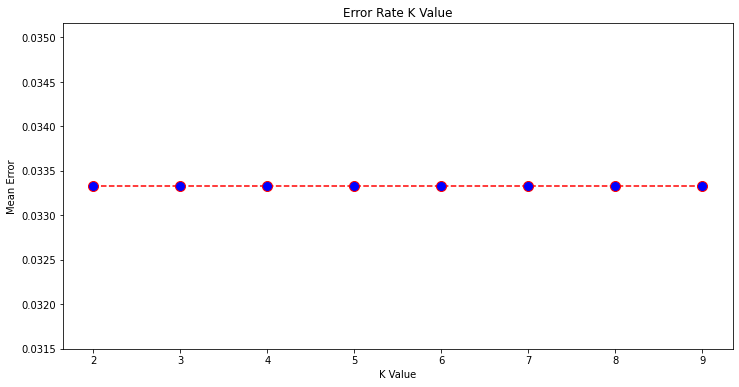

In [ ]:
# Calculating error for K values between 2 and 10
error = []
import matplotlib.pyplot as plt
for i in range(2, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(2, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## Naive Bayes Classifier(Tugas 4)

### Pengertian Naive Bayes Classifie
Pengklasifikasi Naive Bayes adalah model pembelajaran mesin probabilistik yang digunakan untuk tugas klasifikasi. Inti dari classifier didasarkan pada teorema Bayes.

### Rumus teorema bayes
$$ P(H|X) = \frac{P(X|H)P(H)} {P(X)}$$

Dimana :
*   **X** : Data kelas yang belum diketahui
*   **H** : Hipotesa dari X yang merupakan data kelas spesifik 
*   **P(H|X)** : Probabilitas hipotesa H berdasarkan kondisi X
*   **P(H)**   : Probabilitas hipotesa H
*   **P(X|H)** : Probabilitas X berdasarkan kondisi hipotesa H
*   **P(X)** : Probabilitas dari X







In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/Nurul-Faizah/Dataset/main/Iris.csv'
data = pd.read_csv(url)

In [ ]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
data.drop(columns="Id",inplace=True)

In [ ]:
X=data.iloc[:,0:4].values
y=data.iloc[:,4].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
X_test

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2],
       [6.3, 3.3, 6. , 2.5],
       [5. , 3.5, 1.3, 0.3],
       [6.7, 3.1, 4.7, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [6.1, 2.8, 4. , 1.3],
       [6.1, 2.6, 5.6, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.5, 2.8, 4.6, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [4.9, 3.1, 1.5, 0.1],
       [6. , 2.9, 4.5, 1.5],
       [5.5, 2.6, 4.4, 1.2],
       [4.8, 3. , 1.4, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [5.6, 2.8, 4.9, 2. ],
       [5.6, 3. , 4.5, 1.5],
       [4.8, 3.4, 1.9, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [6.2, 2.8, 4.8, 1.8],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.8, 1.9, 0.4],
       [6.2, 2.9, 4.3, 1.3],
       [5. , 2.3, 3.3, 1. ],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 3.1, 5.5, 1.8],
       [5.4, 3. , 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2

In [ ]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [ ]:
y_train.shape

(105,)

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


## K-Means Clustering (Tugas 5)

## Pengertian K-Means
K-means merupakan salah satu algoritma yang bersifat unsupervised learning. K-Means memiliki fungsi untuk mengelompokkan data kedalam data cluster. Algoritma ini dapat menerima data tanpa ada label kategori. 

K-Means Clustering Algoritma juga merupakan metode non-hierarchy. Metode Clustering Algoritma adalah mengelompokkan beberapa data ke dalam kelompok yang menjelaskan data dalam satu kelompok memiliki karakteristik yang sama dan memiliki karakteristik yang berbeda dengan data yang ada di kelompok lain. 

Cluster Sampling adalah teknik pengambilan sampel di mana unit-unit populasi dipilih secara acak dari kelompok yang sudah ada yang disebut ‘cluster, nah Clustering atau klasterisasi adalah salah satu masalah yang menggunakan teknik unsupervised learning.

### Karakteristik dari K-Means Cluster:

1. Cepat dalam proses clustering
2. Sensitif terhadap nilai centroid
3. Hasil dari Kmeans selalu berubah ubah(dikarenakan tidak unik)
4. Sulit meraih global optimum



### Kekurangan dari K-Means clustering

1. cluster model berbeda ditemukan
2. sulit untuk memilih jumlah cluster yang tepat
3. Overlapping
4. Kegagalan dalam konverge

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/Nurul-Faizah/Dataset/main/Iris.csv'
columns = ['sepal-length','sepal-width','petal-length','petal-width','class']
data = pd.read_csv(url)

In [ ]:
data.drop(columns='Id',inplace=True)

In [ ]:
x = data.values[:, 0:4]

In [ ]:
y = data.values[:,4]

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
label = le.fit_transform(y)

In [ ]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
dfkelas = pd.DataFrame(label, columns=['class'])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_new = pca.fit_transform(x)

In [ ]:
x_new

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

In [ ]:
from sklearn.cluster import KMeans
#number of cluster
kmeans = KMeans = KMeans(n_clusters=3)
#fitting the input data
kmeans= kmeans.fit(x_new)
#getting the clusters  labels
prediksi = kmeans.predict(x_new)
#centroids values
centroids = kmeans.cluster_centers_

In [ ]:
centroids

array([[ 2.34645113,  0.27235455],
       [-2.64084076,  0.19051995],
       [ 0.66443351, -0.33029221]])

In [ ]:
x_new[:,1:12].shape

(150, 1)

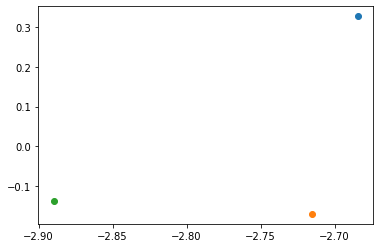

In [ ]:
from numpy import unique
from matplotlib import pyplot
from numpy import where 
yhat = unique(prediksi)
clusters = unique(yhat)
#create scatter plot for samples from each cluster
for cluster in clusters:
  #get row indexes for samples with this cluster
  row_ix = where (yhat == cluster)
  #create scatter of these samples
  pyplot.scatter(x_new[row_ix,0],x_new[row_ix,1])
#show the plot
pyplot.show()

In [ ]:
a=prediksi
mapping = {1:0, 0:1, 2:2}
a = [mapping[i] for i in a]

In [ ]:
prediksi = np.array(a)
prediksi

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(label,prediksi)

0.09333333333333334

In [ ]:
type(x_new[row_ix, 0])

numpy.ndarray

In [ ]:
x_new[row_ix,0]

array([[-2.88981954]])

In [ ]:
x[row_ix,1]

array([[3.2]], dtype=object)

In [ ]:
yhat

array([0, 1, 2], dtype=int32)

## Decision tree (Tugas 6)

### Pengertian Decision Tree
Decision Tree (Pohon keputusan) adalah jenis pembelajaran mesin terawasi(supervise) yang digunakan untuk mengkategorikan atau membuat prediksi berdasarkan bagaimana serangkaian pertanyaan sebelumnya dijawab.
Supervise artinya model dilatih dan diuji pada sekumpulan data yang berisi kategorisasi yang diinginkan.

### Jenis Keputusan
Ada dua jenis utama pohon keputusan berdasarkan variabel sasaran, yaitu pohon keputusan variabel kategorikal dan pohon keputusan variabel kontinu.

1. Pohon keputusan variabel kategori
Sebuah pohon keputusan variabel kategoris termasuk variabel target kategoris dibagi ke dalam kategori. Misalnya, kategori bisa ya atau tidak. Kategori berarti bahwa setiap tahap proses pengambilan keputusan termasuk dalam salah satu kategori ini, dan tidak ada di antaranya.

2. Pohon keputusan variabel kontinu
Pohon keputusan variabel kontinu adalah pohon keputusan dengan variabel target kontinu. Misalnya, pendapatan individu yang pendapatannya tidak diketahui dapat diprediksi berdasarkan informasi yang tersedia seperti pekerjaan, usia, dan variabel kontinu lainnya.

### Rumus Gini Index
$$ Gini Index = 1-Σ_i^n (P_i)^2$$

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns

url = 'https://raw.githubusercontent.com/Nurul-Faizah/Dataset/main/Iris.csv'
data = pd.read_csv(url)

In [16]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
y = data["Species"]
X = data.drop(columns=["Species"])
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X, y)

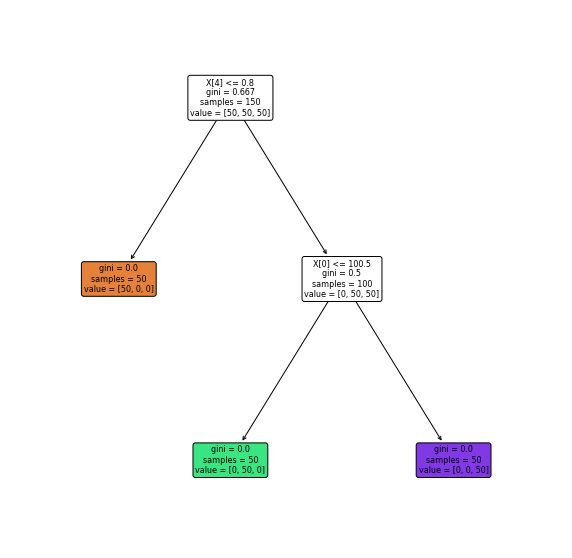

In [18]:
#plt the figure, setting a black background
plt.figure(figsize=(10,10))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()